# Prevendo atrasos de voos ✈

Nosso case a ser analisado na aula de hoje é um dataset que contém algumas características sobre informações de voos.

Nosso foco basicamente consiste em prever se um determinado voo sofrerá atrasos, a partir da informação da partida programada.



*   Flight: Número do voo.
*   Time: Horário de partida do voo.
*   Length: Duração do voo.
*   Airline: Nome do avião.
*   AirportFrom: Partida.
*   AirportTo: Destino.
*   DayOfWeek: Dia da semana

*  Class: Classe de atraso.




Vamos trabalhar com os dados?

In [2]:
# Importando as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Importando a base de dados
df = pd.read_csv('airlines.csv',sep=',')


In [4]:
# Analisando as primeiras linhas
df.head(3)


,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,DL,ATL,HOU,1,0
1,6948.0,360.0,146.0,OO,COS,ORD,4,0
2,1247.0,1170.0,143.0,B6,BOS,CLT,3,0


In [5]:
df.shape


(539382, 8)

# Analisando a consistência dos dados

Vamos validar se o dataset contém dados nulos e valores duplicados.

In [6]:
# Analisando valores nulos
df.isnull().sum()


Flight         0
Time           0
Length         0
Airline        0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Class          0
dtype: int64

In [7]:
# Limpando os dados nulos / Caso tivesse. Já vimos acima que a base não possui valores nulos
df = df.dropna()


Conforme analisado, não temos nenhum valor nulo na base de dados


# Verificando se há dados duplicados


In [8]:
duplicated_cols = [] # Cria uma lista vazia chamada duplicated_cols que será usada para armazenar os nomes das colunas que contêm valores duplicados.
for col in df.columns: # Inicia um loop que percorre todas as colunas do DataFrame df. A variável col representará o nome de cada coluna em cada iteração.
    if df[col].duplicated().any(): # Para cada coluna col, a função df[col].duplicated() cria uma série booleana indicando se cada valor na coluna é um duplicado de um valor anterior. O método .any() verifica se algum dos valores nessa série é True (ou seja, se há valores duplicados na coluna). Objetivo: Verificar se a coluna atual contém valores duplicados.
        duplicated_cols.append(col) # Se a condição no passo anterior for verdadeira (ou seja, se a coluna tiver valores duplicados), o nome da coluna é adicionado à lista duplicated_cols.
print(duplicated_cols) # Após o loop ter percorrido todas as colunas do DataFrame, a lista duplicated_cols é impressa. Esta lista contém os nomes das colunas que possuem valores duplicados.


['Flight', 'Time', 'Length', 'Airline', 'AirportFrom', 'AirportTo', 'DayOfWeek', 'Class']


Conforme a análise sobre os valores duplicados, podemos considerar o comportamento normal pois podemos ter vários casos com o mesmo valor na base.  
Como por exemplo, dias da semana.

# Análise exploratória dos dados

Vamos construir uma análise inicial para conhecer os dados! Primeiramente, vamos aplicar a análise estatística descritiva dos dados e fazer algumas inferências sobre os dados.

In [9]:
df.describe()


,Flight,Time,Length,DayOfWeek,Class
count,539382.000000,539382.000000,539382.000000,539382.000000,539382.000000
mean,2427.927988,802.728161,132.202104,3.929666,0.445443
std,2067.431700,278.045546,70.117045,1.914666,0.497015
min,1.000000,10.000000,0.000000,1.000000,0.000000
25%,712.000000,565.000000,81.000000,2.000000,0.000000
50%,1809.000000,795.000000,115.000000,4.000000,0.000000
75%,3745.000000,1035.000000,162.000000,5.000000,1.000000
max,7814.000000,1439.000000,655.000000,7.000000,1.000000


Inferência:

*  Média de duração de voos é de 133
*  Desvio padrão: 70

Se o desvio padrão é baixo em relação à média, isso significa que a maioria dos valores estão próximos da média e que os dados estão mais concentrados em torno da média.  

Vamos dar uma olhadinha nos gráficos:



Vamos analisar o tempo do voo utililzando um gráfico de violin em conjunto com boxplot:

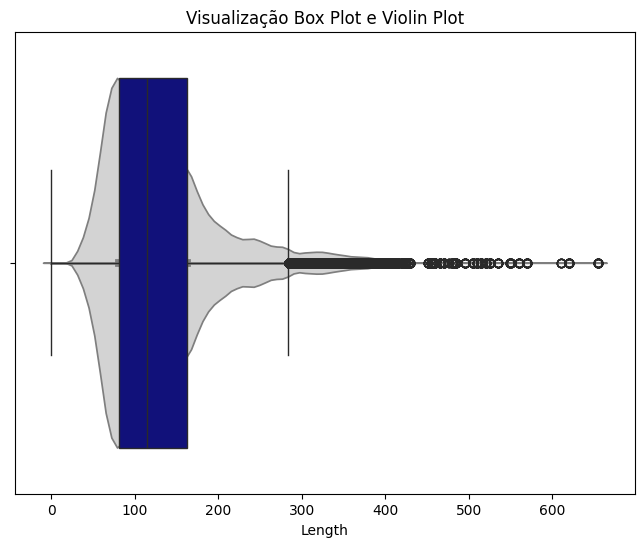

In [17]:
#Podemos também mesclar os dois tipos de gráficos para entender nossos valores discrepantes
fig, ax = plt.subplots(figsize=(8,6))
#Configurando o violin plot primeiramente
sns.violinplot(x='Length', data=df, ax=ax, color='lightgray')
#Por baixo vamos criar um boxplot
sns.boxplot(x='Length', data=df, ax=ax, whis=1.5, color='darkblue')
ax.set_title('Visualização Box Plot e Violin Plot')
#Mostrando o gráfico
plt.show()


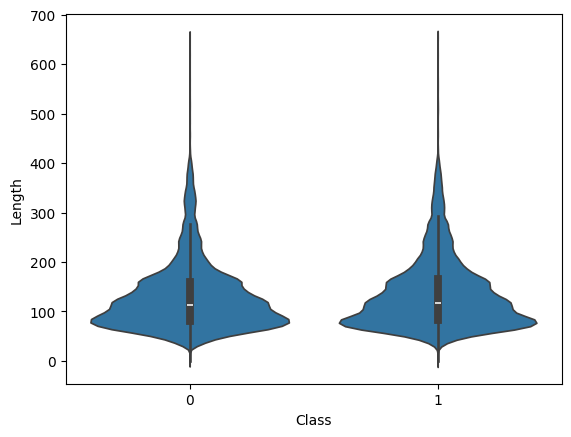

In [18]:
sns.violinplot(x='Class', y='Length', data=df)
plt.show()


Perceba que a distribuição dos dados entre as classes de atraso sim e não são bem parecidas. Vamos olhar a média de duração dos voos um pouco mais de perto.

In [19]:
atraso_voo = df.groupby('Class')
atraso_voo.describe().T


Class                        0              1
Flight    count  299118.000000  240264.000000
          mean     2513.484842    2321.413508
          std      2102.883185    2017.368082
          min         1.000000       1.000000
          25%       725.000000     701.000000
          50%      1924.000000    1695.000000
          75%      3931.000000    3408.000000
          max      7812.000000    7814.000000
Time      count  299118.000000  240264.000000
          mean      765.235138     849.405308
          std       283.712464     263.472137
          min        10.000000      10.000000
          25%       515.000000     640.000000
          50%       735.000000     860.000000
          75%       998.000000    1060.000000
          max      1439.000000    1439.000000
Length    count  299118.000000  240264.000000
          mean      129.657760     135.369697
          std        68.693953      71.723475
          min         0.000000       0.000000
          25%        81.000000      82.000000
          50%       114.000000     118.000000
          75%       159.000000     166.000000
          max       655.000000     655.000000
DayOfWeek count  299118.000000  240264.000000
          mean        3.974622       3.873697
          std         1.907565       1.922004
          min         1.000000       1.000000
          25%         2.000000       2.000000
          50%         4.000000       4.000000
          75%         5.000000       5.000000
          max         7.000000       7.000000

Analisando as estatísticas acima, perceba que a variável time é mais discrepante que a Length. Vamos plotar mais gráficos para analisar o comportamento de Time.


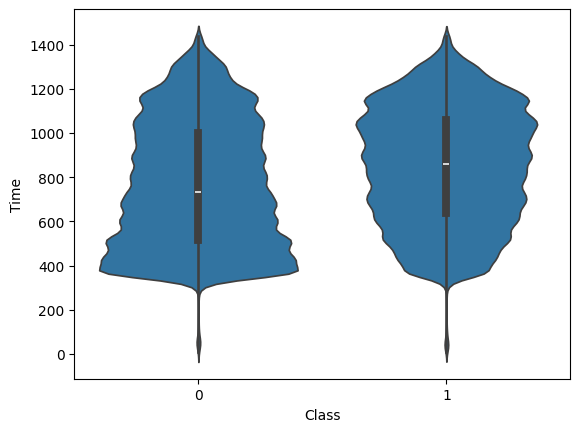

In [20]:
# Comparando o Tempo com o Atraso
sns.violinplot(x='Class', y='Time', data=df)
plt.show()

# Time = hora de saída do voo


Analisando as Companhias x Atraso dos vôos

<Axes: xlabel='Airline', ylabel='count'>

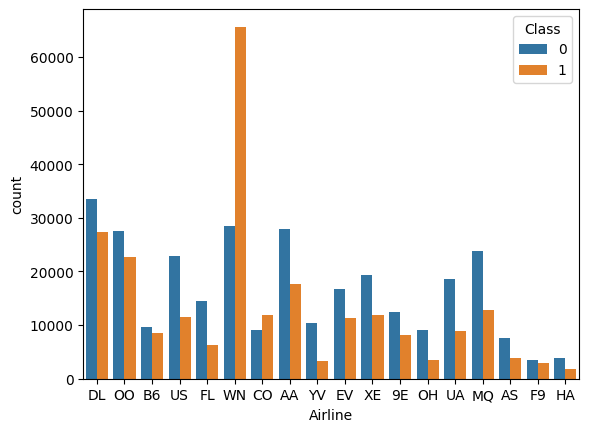

In [21]:
# Vamos comparar as Companhias Aereas com os Atrasos (Classe de Atraso = Class)
sns.countplot(x='Airline', hue='Class', data=df)


No gráfico acima é possível verificar a discrepancia de atrasos na Companhia WN. 

** Inferência sobre os dados:  

Podemos observar que todas a companhias aereas possuem a classe de atraso porém são menores do que os voos sem atraso. Apenas a companhia  
WN possui um grande número de atrasos, ultrapassando o total de voos realizados em tempo.

Vamos analisar os dias da semana que possuem maior concentração de atrasos

Text(0.5, 1.0, 'Contagem por Dia da Semana')

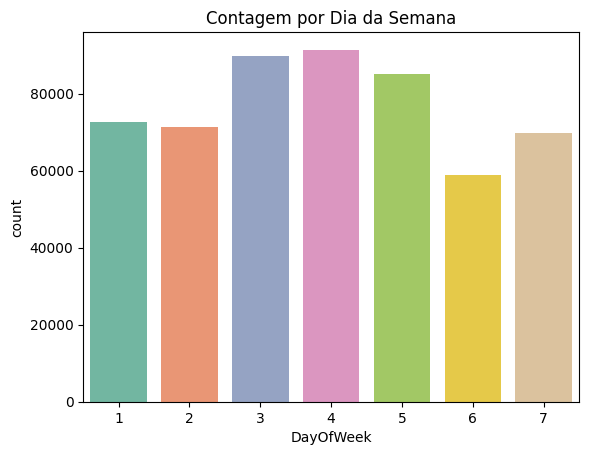

In [26]:

# Definindo os dias da semana
diaSemana = list(range(1, 8)) # Quando criamos um range ele sempre mostra (-1)

# Criando o countplot com uma paleta de cores e usando o parâmetro hue
sns.countplot(x='DayOfWeek', hue='DayOfWeek', data=df, order=diaSemana, palette='Set2', dodge=False)

# Removendo a legenda
plt.legend([],[], frameon=False)


# Configurando o título do gráfico
plt.title('Contagem por Dia da Semana')


***A maior concentração de atrasos ocorre na quarta-feira

Vamos analisar se a base está equilibrada com o número de atrasos e não atrasos: 

<Axes: xlabel='Class', ylabel='count'>

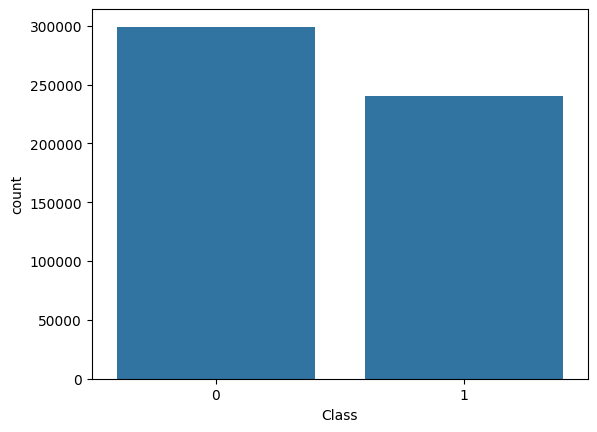

In [27]:
sns.countplot(x='Class', data=df)


Observe que aqui podemos ter um problema ao construir um modelo de classificação. A base de dados não está equilibrada e a falta de equilíbrio na base  
de dados pode deixar o algoritmo enviesado.  

Esse tipo de problema é chamado de **"desbalanceamento de classes"**.  

Quando uma classe é muito mais frequente que as outras no conjunto de dados, o modelo tende a dar mais importância a essa classe, o que   
pode levar a uma classificação incorreta das classes minoritárias. Devido a isso precisamos fazer uma forma de equilibrar esses valores.

Vamos criar um classifcar utilizando dados desbalanceados e vamos analisar o que pode acontecer no modelo de Machine Learning



# **Pré-processamento da base**

Para utilizar a companhia aerea dentro do modelo, vamos realizar a transformação de label enconding nos dados.

In [28]:
from sklearn.preprocessing import LabelEncoder


In [29]:
# Ideal para a variável quando ela é texto
#  A LabelEncoder pega a sua variável texto e a transforma em um representação numérica
df['AirportFrom'] = LabelEncoder().fit_transform(df['AirportFrom'])
df['AirportTo'] = LabelEncoder().fit_transform(df['AirportTo'])


In [30]:
df['Airline'] = LabelEncoder().fit_transform(df['Airline'])


In [31]:
df.head(3)


,Flight,Time,Length,Airline,AirportFrom,AirportTo,DayOfWeek,Class
0,2313.0,1296.0,141.0,5,16,129,1,0
1,6948.0,360.0,146.0,12,65,208,4,0
2,1247.0,1170.0,143.0,3,35,60,3,0
